# Uczenie Maszynowe: Naiwny klasyfikator bayesowski

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

[[ 2.6594765   3.82634452]
 [ 5.9629833   5.33853973]
 [ 2.04138148  3.36702458]
 [ 5.89839324  3.04910321]
 [ 6.74587935  3.35591312]
 [ 3.01671592  4.40855768]
 [ 3.53459075  3.96190567]
 [ 2.35220595  4.76020887]
 [ 4.58659826  3.16678646]
 [ 5.10900503  3.32120645]
 [ 4.95978724  3.65077474]
 [ 4.24520845  3.87378223]
 [ 4.07819439  3.44991937]
 [ 5.01720794  4.46782339]
 [ 4.61904457  5.43583603]
 [ 3.85097754  5.10603158]
 [ 3.44978345  3.43631806]
 [ 5.61719705  4.37868356]
 [ 4.30906217  2.53798193]
 [ 2.7545344   3.8042205 ]
 [ 5.43128343  4.11400522]
 [ 5.81781997  2.60375472]
 [ 1.73911041  5.42661153]
 [ 5.26531362  4.17525299]
 [ 3.25458643  4.29071941]
 [ 2.46926199  2.61098107]
 [ 3.53532093  3.59919567]
 [ 2.81809401  2.98497669]
 [ 4.67362464  3.679298  ]
 [ 3.77133923  4.69256342]
 [ 3.62710714  3.18857553]
 [ 5.71482317  3.72842425]
 [ 0.89062551  6.31396631]
 [ 4.71588555  4.24781775]
 [ 2.7110462   4.27698308]
 [ 4.39524587  3.71553886]
 [ 3.51557647  5.9921052 ]
 

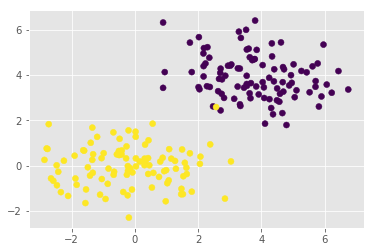

In [12]:
from helpers import generate1, generate2, generate3

X, y = generate1()
plt.scatter(X[:,0], X[:,1], c = y)
print(X)
print(y)

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa dla zmiennych ciągłych.

In [10]:
from  scipy.stats import norm

# (X, mean, std)
norm.pdf(5, 0, 1) #gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1) #logarytm gęstości prawd. dla 5 z rozkładu standardowego

-13.418938533204672

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [60]:

class GaussianNaiveBayes():
    def __init__(self):
        self.means = {} 
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych średnich dla każdego atrybutu 
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) means[1] powinno zawierać wektor średnich wartości atrybutów  dla klasy o indeksie 1
        #     2) means[0][1] powinno zawierać średnią 1 atrybutu dla klasy o indeksie 0
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.stds = {} 
        # Analogiczna struktura dla odchyleń standardowych
        self.class_log_prob = None 
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas 
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)
        
    def fit(self, X, y):
        # TWÓJ KOD TUTAJ - proces uczenia czyli uzupełniania struktur zainicjaliowanych w init()
        # X jest macierzą gdzie każdy wiersz zawiera kolejną obserwację (obie typu np.array) 
        # y jest wektorem wartości indeksu klasy (0 lub 1). Jego wartości odpowiadają kolejnym wierszom X
        unique, counts = np.unique(y, return_counts=True)
        self.class_log_prob = np.log(counts/np.sum(counts))
        for clazz in unique:
            self.means[clazz] = np.mean(X[y == clazz], axis=0) # "y == clazz" daje tablicę Fałszów i Prawd, którą to tablicą wybieramy podzbiór X tworząc nową tablicę
            self.stds[clazz] = np.std(X[y == clazz], axis=0)
        
    def predict_proba(self, X):
        # TWÓJ KOD TUTAJ - predykcja - zwrócenie prawdopodobieństwa dla każdej klasy i każdej obserwacji
        # Funkcja powinna zwrócić macierz o dwóch kolumnach (dwie klasy) w której kolejne wiersze 
        # zawierają prawdopodobieństwa P(c|x) przynależności dla klas dla kolejnych obserwacji w macierzy X
        results = np.tile(self.class_log_prob, (X.shape[0],1)) #zainicjuj "results" log-prawdopodobieństwami bezwarunkowymi klasy (a priori, po ang. "priors")
        for i in range(len(self.class_log_prob)): #dla każdej klasy...
            for j in range(X.shape[1]): #dla każdego atrybutu...
                results [:,i] += norm.logpdf(X[:,j], loc=self.means[i][j], scale=self.stds[i][j]) #dodaj log-prawdopodobieństwa warunkowe P(x|c)
        probabilities = np.exp(results) #wracamy z log-prawdopodobieństwa do prawdopodobieństwa
        probabilities /= np.sum(probabilities, axis=1, keepdims=True) #teraz to są naprawdę prawdopodobieństwa, bo znormalizowaliśmy
        return probabilities
    
    def predict(self, X):
        # Gotowa funkcja wybierająca klasę z największym prawdopodobieństwem
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)


Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [77]:
X, y = generate1(100)
gnb = GaussianNaiveBayes()
gnb.fit(X,y)
#Trafność na zbiorze uczącym
np.mean(gnb.predict(X) == y)


0.99

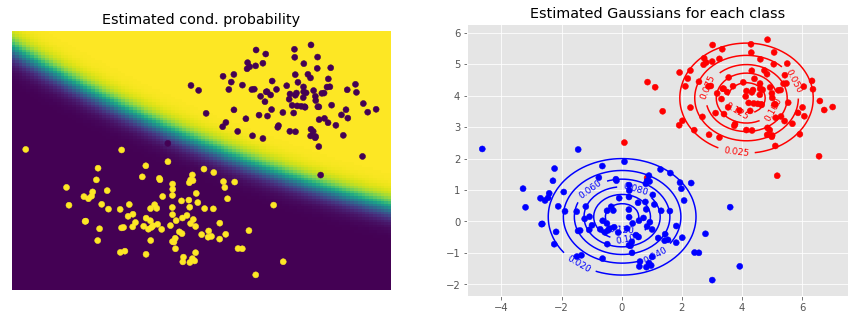

In [78]:
from helpers import plotGaussianBayes
plotGaussianBayes(X, y, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [71]:
X_test, y_test = generate1(1000)
np.mean(gnb.predict(X_test) == y_test)

0.9925

**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego? 
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki? 

1. Generatory prezentują 3 sytuacje 1) zmienne niezależne 2) zmienne zależne ale klasyfikator dobrze sobie radzi 
3) Zmienne zależne powodujące znaczną utratę trafności. 
Zależności można zidentyfikować po prostu na podstawie obejrzenia wykresów wygenerowanych danych lub (jeśli chcesz bardziej bezpośrednio) poprzez zajrzenie do źródła generatora i obejrzenie użytych macierzy wariancji-kowariancji. Brak znacznego wpływu zależności na trafność w sytuacji (2) można wytłumaczyć poprzez narysowanie "krzyża" o długości około 3 wariancji w każdej osi, a następnie poprzez analizę nakładania się ich patrząc na każdą z osi z osobna. Sytuacja 2 wyjaśnia użyteczność NB w praktyce - zmienne prawie zawsze są zależne i estymacja prawdopodobieństwa jest błędna (co widać na wykresach), ale niekoniecznie musi to negatywnie wpływać na jakość predykcji (co również widać) - bowiem jest różnica pomiędzy prawidłową klasyfikacją (zgadza się to, które prawdopodobieństwo jest największe) a prawidłową estymacją prawdopodobieństwa (zgadza się jego wartość).  W analizie ćwiczenia warto też zwrócić uwagę, że Gaussian NB jest klasyfikatorem liniowym: https://stats.stackexchange.com/questions/142215/how-is-naive-bayes-a-linear-classifier 
2. Ładnie widać dużo lepsze dopasowanie się do rozkładu danych, a w sytuacji (3) dużo lepszą jakość predykcji.
3. Macierz wariancji-kowariancji jest osobliwa w takiej sytuacji. Im więcej cech tym więcej przykładów dla każdej z klas jest potrzebnych - dokładnie (n+1). Dodatkowo należy wspomnieć o jakości estymat - szczególnie o traceniu stopni swobody.
4. 100% trafność klasyfikacji jest możliwa do uzyskania tylko jeżeli warunkowe prawdopodobieństwa P(y|x) = 1 lub 0 dla każdego x. Jeżeli nie jest to prawda to nie jest możliwe skonstruowanie klasyfikatora ze 100% trafnością.
5. Nie, ale jest to klasyfikator teoretycznie "idealny" tj. o najwyższej możliwej trafności predykcji - klasyfikator Bayesa. Zgodnie z prawem wielkich liczb wraz z rozmiarem próbki GaussianBayes w takiej sytuacji jest zbieżny do tego klasyfikatora. Warto podkreślić brak powiązania NB z rozkładem normalnym - można modelować zmienne bardziej odpowiednimi dla nich rozkładami.

## Zadanie 2
Zaimplementuj algorytm naiwnego Bayesa dla binarnych cech. 

*Wskazówka:* W zależności od Twojej implementacji funkcja `np.nan_to_num` może być przydatna do zabezpieczenia się przed sytuacją mnożenia zerowego prawdopodobienstwa (logarytm 0 na komputerze to $-\infty$) przez zero.

In [82]:
from  scipy.stats import norm
class NaiveBayes():
    def __init__(self):
        self.prob = {}
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych prawdopodobieństw dla każdego atrybutu 
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) prob[2] powinno zawierać wektor prawdopodobieństw o długości równej liczbie atrybutów. 
        #       Każda kolejna wartość wektora to prawdopodobieństwo, że dla klasy o indeksie 2 kolejny atrybut 
        #       przyjmie wartość 1.
        #     2) prob[0][6] powinno zawierać prawdopodobieństwo, że szósty atrybut równa się 1 dla klasy o indeksie 0 
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.class_log_prob = None
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas 
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)
        
    def fit(self, X, y):
        # TWÓJ KOD TUTAJ
        unique, counts = np.unique(y, return_counts=True)
        self.class_log_prob = np.log(counts/np.sum(counts))
        for clazz in unique:
            class_data = X[y == clazz] #wybieramy z X przypadki z klasy clazz
            self.prob[clazz] = (np.sum(class_data, axis=0)) / (class_data.shape[0]) #ile razy wartość każdego atrybutu jest równa 1 / liczba przypadków z klasy clazz

        
    def predict_proba(self, X):
        # TWÓJ KOD TUTAJ
        results = np.tile(self.class_log_prob, (X.shape[0], 1))
        for i in range(len(self.class_log_prob)):
            results [:,i] += np.nan_to_num(X@np.log(self.prob[i].T))
            results [:,i] += np.nan_to_num((1-X)@np.log(1-self.prob[i].T))
        probabilities = np.exp(results)
        probabilities /= np.sum(probabilities, axis=1, keepdims=True)
        return probabilities
    
    def predict(self,X):
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)

Przetestuj algorytm dla podanych danych. 

In [83]:
nb = NaiveBayes()
X = np.array([[1,1,1], [0,1,1], [0,0,1], [0,0,0]])
y = np.array([1,1,0,0])
nb.fit(X,y)
nb.predict_proba(X)

/home/jakub/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/home/jakub/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


array([[0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [1. , 0. ]])

Podejrzyjmy wyestymowane wartości prawdopodobieństw:

In [84]:
nb.prob

{0: array([0. , 0. , 0.5]), 1: array([0.5, 1. , 1. ])}

Spójrzmy na analogiczną listę estymat dla gotowej implementacji algorytmu `FullBayes` (czyli wersji algorytmu bez założenia o niezależności).

In [85]:
from helpers import FullBayes
fb = FullBayes()
fb.fit(X,y)
fb.prob

{1: {(0, 0, 0): 0,
  (0, 0, 1): 0,
  (0, 1, 0): 0,
  (0, 1, 1): 1,
  (1, 0, 0): 0,
  (1, 0, 1): 0,
  (1, 1, 0): 0,
  (1, 1, 1): 1,
  'suma': 2},
 0: {(0, 0, 0): 1,
  (0, 0, 1): 1,
  (0, 1, 0): 0,
  (0, 1, 1): 0,
  (1, 0, 0): 0,
  (1, 0, 1): 0,
  (1, 1, 0): 0,
  (1, 1, 1): 0,
  'suma': 2}}

Czy coś cię niepokoi w wyświetlonych estymacjach? Jak ten problem będzie się zmieniał w zależności od rozmiaru zbioru i rozmiaru wymiarowości?

Odpowiedź: dużo zer, za mało danych by stworzyć poprawne estymacje. Rozmiar wymiarowości: odpowiedź znajdziesz poniżej w tekście, rozmiar zbioru - im większy zbiór, tym ten problem będzie mniej widoczny.

## Zadanie 2b
Rozszerz Twój kod o estymowanie prawdopodobieństwa estymatą Laplace'a

In [86]:
class SmoothNaiveBayes(NaiveBayes):     
    def fit(self, X, y):
        # TWÓJ KOD TUTAJ
        unique, counts = np.unique(y, return_counts=True)
        self.class_log_prob = np.log((counts+1)/(np.sum(counts)+len(unique)))
        for clazz in unique:
            class_data = X[y == clazz]
            self.prob[clazz] = (np.sum(class_data, axis=0)+1)/(class_data.shape[0]+2) # "+2" bo są dwie wartości atrybutu (cechy są binarne)

Również przetestuj działanie metody i porównaj uzyskane estymaty z wersją algorytmu bez rozmywania.

In [87]:
snb = SmoothNaiveBayes()
snb.fit(X,y)
snb.predict_proba(X)

array([[0.1 , 0.9 ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.9 , 0.1 ]])

Pora na test działania zaimplementowanych metod na większych zbiorach danych. W tym celu użyjemy funkcji `generate_binary`, która generuje sztuczne binarne dane. Jej pierwszym argumentem jest liczba przykładów uczących, a drugim argumentem jest liczba cech $k$. Poniższy kod nie tylko generuje dane, ale także dzieli je na cześć uczącą i testową.

In [88]:
from helpers import generate_binary
Xb, yb = generate_binary(5500, k = 10)
X_train, y_train = Xb[:5000], yb[:5000]
X_test, y_test = Xb[5000:], yb[5000:]

Wytrenuj na tych większych danych zaimplementowane przez ciebie algorytmy `NaiveBayes` i `SmoothNaiveBayes`,  także gotowe metody `FullBayes` i `SmoothFullBayes` z `helpers`, które są pozbawione założenia o niezależności zmiennych. Dla każdego klasyfikatora zmierz trafność klasyfikacji i podejrzyj zawartości estymat `print(classifier.prob)`.

In [89]:
from helpers import SmoothFullBayes, FullBayes
#TWÓJ KOD TUTAJ
fnb = FullBayes()
fnb.fit(X_train, y_train)
fnb.prob

{0: {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 8,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 7,
  (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 0,
  (0, 0, 0, 0, 0, 0, 0, 0, 1, 1): 0,
  (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 1, 0, 1): 0,
  (0, 0, 0, 0, 0, 0, 0, 1, 1, 0): 0,
  (0, 0, 0, 0, 0, 0, 0, 1, 1, 1): 0,
  (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 0,
  (0, 0, 0, 0, 0, 0, 1, 0, 0, 1): 0,
  (0, 0, 0, 0, 0, 0, 1, 0, 1, 0): 0,
  (0, 0, 0, 0, 0, 0, 1, 0, 1, 1): 0,
  (0, 0, 0, 0, 0, 0, 1, 1, 0, 0): 0,
  (0, 0, 0, 0, 0, 0, 1, 1, 0, 1): 0,
  (0, 0, 0, 0, 0, 0, 1, 1, 1, 0): 0,
  (0, 0, 0, 0, 0, 0, 1, 1, 1, 1): 0,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 0,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 1): 0,
  (0, 0, 0, 0, 0, 1, 0, 0, 1, 0): 0,
  (0, 0, 0, 0, 0, 1, 0, 0, 1, 1): 0,
  (0, 0, 0, 0, 0, 1, 0, 1, 0, 0): 0,
  (0, 0, 0, 0, 0, 1, 0, 1, 0, 1): 0,
  (0, 0, 0, 0, 0, 1, 0, 1, 1, 0): 0,
  (0, 0, 0, 0, 0, 1, 0, 1, 1, 1): 0,
  (0, 0, 0, 0, 0, 1, 1, 0, 0, 0): 0,
  (0, 0, 0, 0, 0, 1, 1, 0, 0, 1): 0,
  (0, 0, 0, 0, 0, 1, 1, 0, 1, 0): 0

Ile estymat zawiera klasyfikator "pełny", a ile klasyfikator naiwny? Jak będzie się to zmieniać wraz z rosnącą liczbą wymiarów?

Odpowiedź: Pełny (2^k - 1), naiwny (k-1), plus każdy z nich ma dodatkowo estymatę P(c). Te wzory pokazują zmiany liczby estymat wraz ze wzrostem liczby wymiarów.

# Zadanie 2c
Zbadajmy zależność pomiędzy trafnością klasyfikacji zaimplementowanych metod przy zmieniającym się rozmiarze zbioru danych. Poniższy kod jest gotowy i początkowo nie musisz w nim nic modyfikować

/home/jakub/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/home/jakub/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/home/jakub/Pulpit/semestr1/UM/github/Naive-Bayes/helpers.py:65: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= np.sum(probabilities, axis=1, keepdims=True)
/home/jakub/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


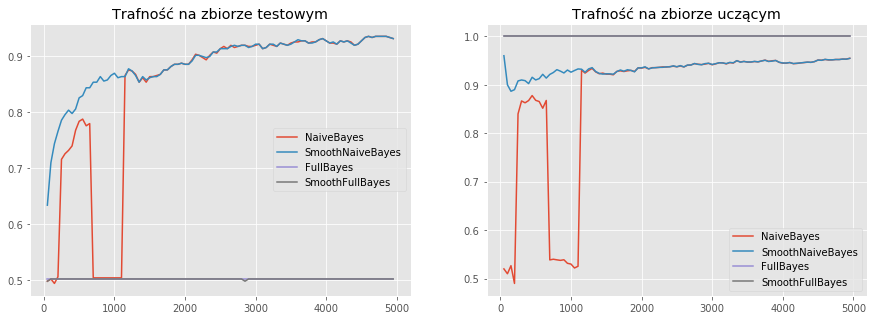

In [94]:
from helpers import SmoothFullBayes, FullBayes, plotAccuracyIterationsPlot
from collections import defaultdict

#Generowanie danych
Xb, yb = generate_binary(5500, k = 100)  # <- Tu kontrolujesz liczbę cech
X_train, y_train = Xb[:5000], yb[:5000]
X_test, y_test = Xb[5000:], yb[5000:]

N = X_train.shape[0]
iterations = range(50, N, 50)  # <- Kontrola ewaluowanych punktów (od 50 do N co 50)

results = defaultdict(list)
results_train = defaultdict(list)

for i in iterations:
    for classifier in [NaiveBayes(), SmoothNaiveBayes(), FullBayes(), SmoothFullBayes()]:
        classifier.fit(X_train[:i],y_train[:i])
        results_train[type(classifier).__name__].append(np.mean(classifier.predict(X_train[:i]) == y_train[:i]))
        results[type(classifier).__name__].append(np.mean(classifier.predict(X_test) == y_test))

# Tę ostatnią linijkę możesz chcieć wywoływać w osobnych komórkach, 
# tak aby na koniec porównać wykresy dla kliku ustawień
plotAccuracyIterationsPlot(iterations, results, results_train)

Wykonaj ekspermenty dla różnej liczby cech: 2, 10, 100, 500

** Ćwiczenia**
 - Czy rozmywanie ma pozytywne skutki dla klasyfikatora naiwnego? a dla klasyfikatora `FullBayes`?
 - Który klasyfikator z testowanych jest najlepszy w jakich sytuacjach?
 - Jaką trafność  ma klasyfikator `FullBayes` na dostatecznie dużym zbiorze uczączym? W jakich sytuacjach `NaiveBayes` mógłby również osiągnąć 100% na uczącym?
 - Czy jest możliwe, żeby klasyfikator `FullBayes` nie będzie miał 100% trafności (nawet zakładając nieskończenie wielki zbiór danych)?
 - Przeanalizuj wygenerowane wcześniej wykresy określając czy mówimy o przeuczeniu czy niedouczeniu czy ...
 - Czy można w jednym klasyfikatorze Naiwnego Bayesa łączyć cechy ciągłe z dyskretnymi? Dlaczego?
 - W jaki sposób można obejść powyższy problem? Podaj co najmniej dwa sposoby.
 - Klasyfikator naiwny robi założenie o warunkowej niezależności cech. Co mógłbyś zrobić jeżeli spodziewasz się, że pewne pary/grupy cech są zależne i może to mieć duży wpływ na jakość predykcji? Podaj przykład takiej sytuacji.
 
1. Tak. Dla Naiwnego dla niektórych danych widać dziwne skoki w jakości działania - niektóre cechy są bardzo rzadkie i pojawienie się ich wraz z daną klasą w zbiorze mocno wpływa na odpowiedź klasyfikatora. Warto też zauważyć, że czasami wylosowany zbiór potrafi być trywialny (ze względu na trafność) z powodu class imbalance rzędu 1:99 - wtedy lepiej powtórzyć eksperyment żeby zobaczyć różnice. 
2. FullBayes/SmoothFullBayes będzie lepszy dla niskiej wymiarowości, dla wysokiej wymiarowości lub/i małego zbioru danych lepszy będzie SmoothNaive. Warto zwrócić uwagę, że w obecnej implementacji podejść Full, mnożenie przez zerowe prawdopodobieństwo jest dość sprawnie zamiatane pod dywan i uzyskuje się odpowiedź ZeroRule.
3. W podanych eksperymentach tak, jest to możliwe ponieważ generowane zbiory są liniowo separowalne.
4. Nie, rozumowanie analogiczne do ćwiczenia dla ciągłych.
5. W zależności od wykresów ;) 
6. Bezpośrednie użycie reguły Bayesa do klasyfikacji danych mieszanych nie jest możliwe, ponieważ prawdopodobieństwo uzyskania przez zmienną ciągłą konkretnej wartości równa się 0. 
7. a) Dyskretyzacja ciągłych i użycie Bayesa dla dyskretnych b) mnożenia gęstości prawdopodobieństw z samymi prawdopodobieństwami. Rozumowanie motywujące takie postępowanie opiera się na odczytywaniu prawdopodobieństwa zmiennej ciągłej w jakimś małym przedziale o długości $\epsilon$. W takiej sytuacji prawd. można przybliżyć jako $\epsilon \cdot f(x)$. Przy $\epsilon \rightarrow 0$ zbiega to do prawidłowego prawd. = 0. Jednak, ponieważ w regule Bayesa to prawdopodobieństwo $\epsilon \cdot f(x)$ pojawia się w liczniku i mianowniku, $\epsilon$ można skrócić. c) ew. mogą się pojawić propozycje zespołu dwóch klasyfikatorów. 
8. Po prostu modelować zależności tylko tych wybranych >małych< podgrup cech. Mnóstwo przykładów: np. analiza wydźwięku i cechy "nie" "dobry". Inny sposób to redukcja skorelowanych cech.

# Zadanie 3
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych: 
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [91]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [  'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(binary=True) # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [95]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [96]:
newsgroups_train.target[0:3]

array([0, 1, 0])

i do "zbinaryzowanego" tekstu

In [97]:
vectors[0:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Wytrenuj klasyfikator i sprawdż jego trafność na zbiorze uczącym i testowym.

In [98]:
nb = SmoothNaiveBayes()
nb.fit(vectors, newsgroups_train.target)
print(np.mean(nb.predict(vectors) == newsgroups_train.target))
print(np.mean(nb.predict(vectors_test) == newsgroups_test.target))

0.9745114698385726
0.9272030651340997


1. Chociaż słowa w języku naturalnym są silnie zależne od siebie, w zadaniach polegających na wykrycie tematów dokumentów dobrym predyktorem jest po prostu istnienie słów=kluczy. Np. dokument o samochodach będzie zawierał słowa "silnik", "kierownica", itd. Jednocześnie te słowa są w miarę jednoznacznymi wskaźnikami tej kategorii i raczej nie będą się pojawiały w innych (zwykle nie jest konieczny kontekst wypowiedzi czy sposób użycia w zdaniu). Czyli wynika to ze specyfiki zadania. Klasyfikacja tekstów niezorientowana na tematy np. analiza wydźwięku jest już duża trudniejsza pod tym względem: "dobry", "nie ... dobry", opisy cech bez explicite używania pozytywnych/negatywnych przymiotników....
2. Najlepszymi wskaźnikami klas są pewne słowa kluczowe "lines, graphics" i "space". Jednak dużo słów jest zwykłym szumem - stopwords i podobne. P(słowa|klasa) jest wysokie dla stopwords ;( Odfiltrowanie ich poprzez dodanie w TfidfVectorizer `stop_words="english"` trochę poprawia te estymaty, ale nadal widzimy niestandardowe stopwords dla tego zbioru - jak nagłówki tesktów "subject", "organization". Możesz dalej je odfiltrowywać np. poprzez porównywanie estymat słów dla każdej z klasy.
3. Tak, jak wyżej.
4. ...
5. Jak najbardziej - patrz odpowiedź do 1. Np. para "talk.religion.misc" i "soc.religion.christian".
6. Przede wszystkim szybkość działania. Problem jest bardzo wysokowymiarowy a cały trening można zrealizować w jednym przejściu po zbiorze danych. Z tego się nota bene wzięła popularność w tekstach - o big data mówimy kiedy mamy duże N albo duże p (wymiarowość). W tekstach big data było w tym drugim kontekście od zarania dziejów...
 Inna zaleta to bardzo prosta modyfikacja dla strumieni danych a także pewna interpretowalność. Pewnego rodzaju minusem natomiast jest potrzeba ręcznego modelowania/wybierania rozkładów i oczywiście naiwność. 
 Drzewa decyzyjne raczej radziłyby sobie gorzej na tym problemie, cechy są binarne i jest ich bardzo dużo więc kolejne splity często nie niosą żadnych informacji. Pruning ograniczyły wykorzystywanie (i identyfikację) wszystkich słów kluczowych, co więcej może się zdarzyć że przy ograniczonej głębokości drzewa żaden z warunków podziałów nie zostanie "zaktywowany" (dane rzadkie, ograniczona liczba podziałów, które pytają się o jedną cechę, a jej brak zwykle nie niesie wiele informacji np. z powodu wieloznaczności słów). Z drugiej strony potencjalnie drzewo mogłby się nauczyć pytac o jakieś frazy "Czy jest słowo machine?" "Czy jest słowo learning?" - jednak użyteczność tego jest ograniczona poprzez reprezentację bag-of-words.

**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z podobną liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemy (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?